# Importing Modules

In [1]:
import numpy as np
from datascience import *
from IPython.display import YouTubeVideo

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## Hypothesis Test Simulation: Smelling Parkinson's (Vaccinations Across the Nation)

In [2]:
yes_no_random_guess = make_array(0.50,0.50)

In [3]:
observed_parkinson = 11

In [8]:
#running one simulation of the experiment below 
one_observation = (sample_proportions(12, yes_no_random_guess)*12).item(0)
one_observation

7.0

In [10]:
num_simulations = 10000

simulated_statistics = make_array()

for i in np.arange(num_simulations):
    one_simulation = (sample_proportions(12, yes_no_random_guess)*12).item(0)
    simulated_statistics = np.append(simulated_statistics, one_simulation)

simulated_statistics

array([ 7.,  5.,  5., ...,  5.,  4.,  7.])

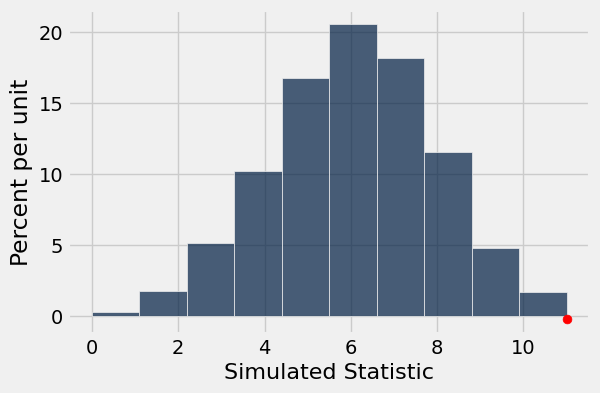

In [11]:
Table().with_columns('Simulated Statistic', simulated_statistics).hist()
plt.scatter(observed_parkinson, -0.002, color='red', s=40);

In [12]:
p_value = np.count_nonzero(simulated_statistics >= observed_parkinson) / num_simulations 
p_value

0.0038

## Hypothesis Test Simulation: Comparing Distributions (Using TVD as a Test Statistic)

In [13]:
jury = Table().read_table('Jury_Alameda.csv')
jury

Ethnicity,Eligible,Panel
Asian / PI,0.15,0.26
Black / AA,0.18,0.08
Caucasian,0.54,0.54
Hispanic,0.12,0.08
Other,0.01,0.04


In [56]:
def total_variation_distance(distribuion1 , distribution2):
    return sum(np.abs(distribuion1 - distribution2))/2

In [57]:
expected_dist = jury.column('Eligible')
observed_dist = jury.column('Panel ')

observed_tvd = total_variation_distance(observed_dist,expected_dist)
observed_tvd

0.14000000000000001

In [58]:
one_sample = sample_proportions(1649000000,expected_dist)
one_sample

array([ 0.14997435,  0.17999695,  0.54000777,  0.12001831,  0.01000262])

In [59]:
total_variation_distance(one_sample,expected_dist)

2.8704063068492325e-05

In [60]:
simulated_tvds = make_array()

for i in np.arange(10000):
    this_simulated_sample = sample_proportions(1000,expected_dist)
    simulated_calculation = total_variation_distance(this_simulated_sample,expected_dist)
    simulated_tvds = np.append(simulated_tvds,simulated_calculation)
    
simulated_tvds

array([ 0.026,  0.013,  0.023, ...,  0.019,  0.055,  0.022])

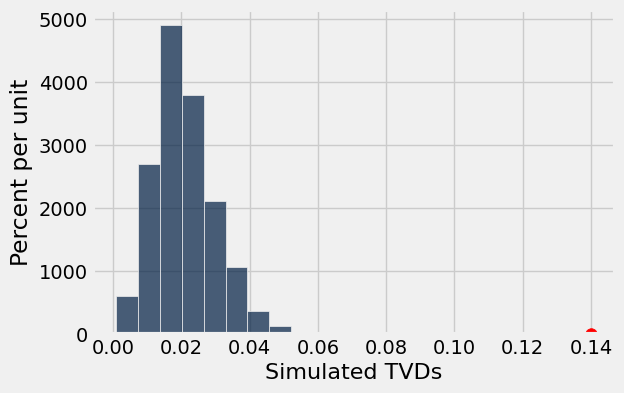

In [61]:
Table().with_column("Simulated TVDs", simulated_tvds).hist()
plt.scatter(observed_tvd, 0, color='red', s=70, zorder=2);
plt.show();

In [39]:
p_value_tvd = np.count_nonzero(simulated_tvds >= observed_tvd) / len(simulated_tvds) 
p_value_tvd

0.0

## Hypothesis Test Simulation: NBA rigged? (Who is Older? a.k.a. A/B Testing)

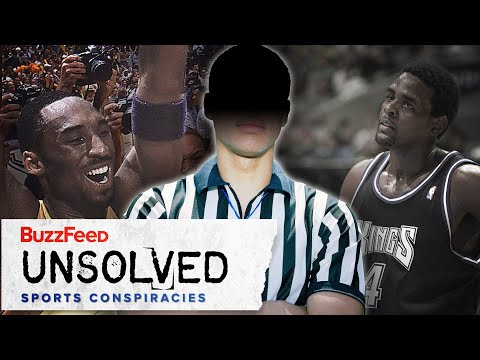

In [40]:
laker_fta = Table().read_table('LAL_2002_FTA_Table.csv')
#Claim starts around 3:05
YouTubeVideo("NU_QFMJD3z0")

In [42]:
laker_fta.show()

Opponent,Date,LAL FTA,Opp FTA,FTA Diff
NJN,6/12/2002,10,5,5
NJN,6/9/2002,14,3,11
NJN,6/7/2002,6,5,1
NJN,6/5/2002,25,10,15
SAC,6/2/2002,11,9,2
SAC,5/31/2002,27,9,18
SAC,5/28/2002,6,10,-4
SAC,5/26/2002,8,2,6
SAC,5/24/2002,8,16,-8
SAC,5/20/2002,16,10,6


In [43]:
def sac_or_notsac(opponent):
    if opponent == 'SAC':
        return opponent
    else:
        return 'Not SAC'
laker_fta = laker_fta.with_column('A/B Opp', laker_fta.apply(sac_or_notsac,'Opponent'))
laker_fta.show()

Opponent,Date,LAL FTA,Opp FTA,FTA Diff,A/B Opp
NJN,6/12/2002,10,5,5,Not SAC
NJN,6/9/2002,14,3,11,Not SAC
NJN,6/7/2002,6,5,1,Not SAC
NJN,6/5/2002,25,10,15,Not SAC
SAC,6/2/2002,11,9,2,SAC
SAC,5/31/2002,27,9,18,SAC
SAC,5/28/2002,6,10,-4,SAC
SAC,5/26/2002,8,2,6,SAC
SAC,5/24/2002,8,16,-8,SAC
SAC,5/20/2002,16,10,6,SAC


In [53]:
observed_diff_ab = 18

In [44]:
shuffled_labels = laker_fta.sample(with_replacement=False).column('A/B Opp')
shuffled_labels

array(['Not SAC', 'Not SAC', 'Not SAC', 'SAC', 'SAC', 'SAC', 'Not SAC',
       'Not SAC', 'SAC', 'SAC', 'Not SAC', 'Not SAC', 'SAC', 'Not SAC',
       'Not SAC', 'SAC', 'Not SAC', 'Not SAC', 'Not SAC'],
      dtype='<U7')

In [50]:
laker_fta = laker_fta.with_column('Shuffled Labels',shuffled_labels)
grouped_fta = laker_fta.group('Shuffled Labels',np.mean).select('Shuffled Labels', 'FTA Diff mean')
grouped_fta.column('FTA Diff mean').item(1) - grouped_fta.column('FTA Diff mean').item(0)

4.464285714285714

In [65]:
grouped_fta

Shuffled Labels,FTA Diff mean
Not SAC,6.16667
SAC,0


In [51]:
simulated_statistics_ab = make_array()

repetitions = 10000

for i in np.arange(repetitions):
    shuffled_labels = laker_fta.sample(with_replacement=False).column('A/B Opp')
    laker_fta = laker_fta.with_column('Shuffled Labels',shuffled_labels)
    grouped_fta = laker_fta.group('Shuffled Labels',np.mean).select('Shuffled Labels', 'FTA Diff mean')
    test_stat = grouped_fta.column('FTA Diff mean').item(1) - grouped_fta.column('FTA Diff mean').item(0)
    simulated_statistics_ab = np.append(simulated_statistics_ab,test_stat)

simulated_statistics_ab

array([-7.07142857,  3.55952381, -1.19047619, ...,  6.72619048,
        2.6547619 , -6.16666667])

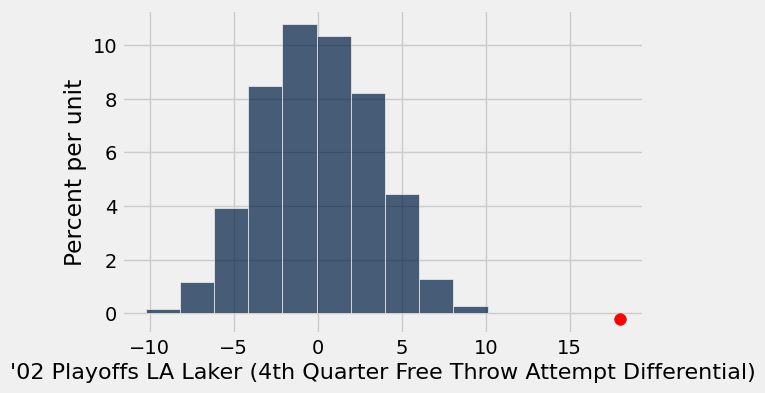

In [63]:
Table().with_columns("'02 Playoffs LA Laker (4th Quarter Free Throw Attempt Differential)", simulated_statistics_ab).hist()
plt.scatter(observed_diff_ab, -0.002, color='red', s=70);

In [55]:
p_val = np.count_nonzero(simulated_statistics_ab >= observed_diff_ab) / repetitions
p_val

0.0